In [1]:
import os

from compose_worker.output_data import run_sbml_pysces
from output_data import generate_sbml_utc_outputs, SBML_EXECUTORS


fp = "/Users/alexanderpatrie/Downloads/BIOMD0000000001_url.xml"
start = 0
end = 100
steps = 1000

job = {
  "job_id": "verification-utc_comparison_sbml-3fff4f04-d10d-4610-bcd2-e0f3e5e50c3c",
  "status": "PENDING",
  "timestamp": "2024-08-29 14:13:23.711913",
  "comparison_id": "utc_comparison_sbml",
  "path": "file_uploads/verification-utc_comparison_sbml-3fff4f04-d10d-4610-bcd2-e0f3e5e50c3c/BIOMD0000000001_url.xml",
  "start": 0,
  "end": 100,
  "steps": 1000,
  "simulators": [
    "amici",
    "copasi",
    "tellurium"
  ],
  "expected_results": None,
  "include_output": True,
  "rTol": None,
  "aTol": None,
  "selection_list": None
}

In [2]:
from output_data import run_sbml_amici, generate_sbml_utc_outputs

o = generate_sbml_utc_outputs(sbml_fp=fp, start=start, dur=end, steps=steps)

2024-08-29 10:29:00.718 - amici.sbml_import - INFO - Finished importing SBML                         (2.65E-02s)
2024-08-29 10:29:00.718 - amici.sbml_import - WARNING - Conservation laws are currently not supported for models with events, piecewise or Heaviside functions, and will be turned off.
2024-08-29 10:29:00.751 - amici.sbml_import - INFO - Finished processing SBML observables            (3.06E-02s)
2024-08-29 10:29:00.753 - amici.sbml_import - INFO - Finished processing SBML event observables      (7.08E-07s)
2024-08-29 10:29:00.845 - amici.de_model - INFO - Finished computing xdot                            (4.84E-03s)
2024-08-29 10:29:00.848 - amici.de_model - INFO - Finished computing x0                              (9.86E-04s)
2024-08-29 10:29:00.860 - amici.de_model - INFO - Finished computing w                               (1.07E-02s)
2024-08-29 10:29:01.587 - amici.de_export - INFO - Finished generating cpp code                      (7.23E-01s)
2024-08-29 10:29:11.315 -

In [7]:
o['amici'].keys()

dict_keys(['BasalACh2', 'IntermediateACh', 'ActiveACh', 'Active', 'BasalACh', 'Basal', 'DesensitisedACh2', 'Desensitised', 'IntermediateACh2', 'DesensitisedACh', 'Intermediate', 'ActiveACh2'])

In [11]:
from basico import * 
sbml_fp = fp 
m = load_model(sbml_fp)

get_species(model=m)

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
BasalACh2,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_12,BLL,NaN,BasalACh2
IntermediateACh,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_13,IL,NaN,IntermediateACh
ActiveACh,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_14,AL,NaN,ActiveACh
Active,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000009,5.400126e+02,Metabolite_15,A,0.000000,Active
BasalACh,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.049817,3.000070e+06,Metabolite_16,BL,0.000000,BasalACh
Basal,compartment1,reactions,mol/l,0.000017,1000.023374,,,0.000017,1000.023374,-0.049826,-3.000610e+06,Metabolite_17,B,0.000333,Basal
DesensitisedACh2,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_18,DLL,NaN,DesensitisedACh2
Desensitised,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_19,D,NaN,Desensitised
IntermediateACh2,compartment1,reactions,mol/l,0.000000,0.000000,,,0.000000,0.000000,0.000000,0.000000e+00,Metabolite_20,ILL,NaN,IntermediateACh2


In [1]:
j = {'status': 'PENDING', 'job_id': 'verification-utc_comparison_sbml-5dd08182-9f55-4687-9545-34604604af07', 'comparison_id': 'utc_comparison_sbml', 'path': 'file_uploads/verification-utc_comparison_sbml-5dd08182-9f55-4687-9545-34604604af07/BIOMD0000000001_url.xml', 'simulators': ['copasi', 'tellurium'], 'timestamp': '2024-08-30 19:52:03.435956', 'start': 0, 'end': 10, 'steps': 100, 'include_outputs': True, 'expected_results': None, 'rTol': None, 'aTol': None, 'selection_list': None}

In [2]:
from workers import VerificationWorker

w = VerificationWorker(j)

await w.run()

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'smoldyn-process',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator',
  'smoldyn-step',
  'simularium-smoldyn-step',
  'database-emitter']


{'results': {},
 'BasalACh2': {'mse': {'copasi': {'copasi': 0.0,
    'tellurium': 3.60245722315961e-13},
   'tellurium': {'copasi': 3.60245722315961e-13, 'tellurium': 0.0}},
  'proximity': {'copasi': {'copasi': True, 'tellurium': True},
   'tellurium': {'copasi': True, 'tellurium': True}},
  'output_data': {'copasi': [0.0,
    7.691270544124278e-08,
    3.521842197501331e-08,
    2.1298444843333163e-08,
    1.662168558998549e-08,
    1.5021230988897863e-08,
    1.44447281516836e-08,
    1.4209216501685115e-08,
    1.4087413868636882e-08,
    1.4003643512249195e-08,
    1.3932728082574167e-08,
    1.3866306315081742e-08,
    1.3801566708100432e-08,
    1.3737600232247931e-08,
    1.3674088863305116e-08,
    1.361092656797813e-08,
    1.354808508916357e-08,
    1.3485547582551264e-08,
    1.342330611972116e-08,
    1.3361361280449281e-08,
    1.3299711935003068e-08,
    1.3238355911016198e-08,
    1.317729086705285e-08,
    1.311651457411248e-08,
    1.3056025527393952e-08,
    1.2995823

In [17]:
w.job_result.keys()

dict_keys(['results', 'BasalACh2', 'IntermediateACh', 'ActiveACh', 'Active', 'BasalACh', 'Basal', 'DesensitisedACh2', 'Desensitised', 'IntermediateACh2', 'DesensitisedACh', 'Intermediate', 'ActiveACh2'])

In [12]:
def _calculate_pairwise_rmse(self) -> dict:
    # get input data
    spec_data = self.job_result
    simulators = self.job_params['simulators']
    if self.job_params.get('expected_results') is not None:
        simulators.append('expected_results')
    n = len(simulators)
    
    # set up empty matrix
    rmse_matrix = np.zeros((n, n))
    
    # enumerate over i,j of simulators in a matrix
    for i, sim_i in enumerate(simulators):
        for j, sim_j in enumerate(simulators):
            if i != j:
                mse_values = []
                for observable, observable_data in spec_data.items():
                    if not isinstance(observable_data, str):
                      mse_data = observable_data['mse']
                      if sim_j in mse_data:
                          # mse_data[sim_j] is a dict containing MSEs with other simulators
                          for comparison_sim, mse_value in mse_data[sim_j].items():
                              if comparison_sim == sim_i:
                                  mse_values.append(mse_value)
                if mse_values:
                    mean_mse = sum(mse_values) / len(mse_values)
                    rmse_matrix[i, j] = math.sqrt(mean_mse)
                else:
                    # TODO: make this more robust
                    rmse_matrix[i, j] = np.nan
            else:
                rmse_matrix[i, j] = 0.0
                
    return pd.DataFrame(rmse_matrix, columns=simulators, index=simulators).to_dict()



In [18]:
_calculate_pairwise_rmse(w)

dict_keys(['results', 'BasalACh2', 'IntermediateACh', 'ActiveACh', 'Active', 'BasalACh', 'Basal', 'DesensitisedACh2', 'Desensitised', 'IntermediateACh2', 'DesensitisedACh', 'Intermediate', 'ActiveACh2'])
results


KeyError: 'mse'

In [6]:
j2 = {'_id': '', 'status': 'PENDING', 'job_id': 'verification-utc_comparison_omex-33e78dd6-be6a-402b-91de-a365828f21ec', 'path': 'file_uploads/verification-utc_comparison_omex-33e78dd6-be6a-402b-91de-a365828f21ec/BIOMD0000000005.omex', 'simulators': ['copasi', 'tellurium'], 'timestamp': '2024-08-30 19:58:07.048935', 'expected_results': None, 'include_outputs': True, 'rTol': None, 'aTol': None, 'selection_list': None}


Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000005.sedml:
    Tasks (1):
      task1
    Reports (1):
      autogen_report_for_task1: 20 data sets
    Plots (1):
      plot1: 2 curves

Executing SED-ML file 1: BIOMD0000000005.sedml ...
  Found 1 tasks and 2 outputs:
    Tasks:
      `task1`
    Outputs:
      `autogen_report_for_task1`
      `plot1`
  Executing task 1: `task1`
    Executing simulation ... succeeded
    Generating 2 outputs ...
      Generating output 1: `plot1` ... succeeded
      Generating output 2: `autogen_report_for_task1` ... succeeded

Bundling outputs ...
Cleaning up ...
Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 1 plots:
  BIOMD0000000005.sedml:
    Tasks (1):
      task1
    Reports (1):
      autogen_report_for_task1: 20 data sets
    Plots (1):
      plot1: 2 curves

Executing SED-ML file 1: BIOMD0000000005.sedml ...
  Found 1 tasks and 2 outputs

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-compose-server-lb7k8x6F-py3.10/lib/python3.10/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning:

Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-compose-server-lb7k8x6F-py3.10/lib/python3.10/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

COMBINE/OMEX archive has warnings.
  - The manifest does not include its parent COMBINE/OMEX archive. Manifests should include their parent COMBINE/OMEX archives.

/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-compose-server-lb7k8x6F-py3.10/lib/python3.10/site-packages/biosimulators_utils/warnings.py:31: SedmlFeatureNotSupportedWarning:

`/var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmp1difvgf5/BIOM

 succeeded
    Generating 2 outputs ...
      Generating output 1: `plot1` ... succeeded
      Generating output 2: `autogen_report_for_task1` ... succeeded

Bundling outputs ...
Cleaning up ...


/Users/alexanderpatrie/Library/Caches/pypoetry/virtualenvs/bio-compose-server-lb7k8x6F-py3.10/lib/python3.10/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning:

Model `model1` may be invalid.
  - The model file `/var/folders/yy/8crj8x7x5_3b86f0js6_0bn00000gr/T/tmpv9jukv5z/BIOMD0000000005_url.xml` has warnings.
    - 9 warnings of type SBML unit consistency (99505). The following is the first warning at line 275, column 8:
      - In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
         The units of the <kineticLaw> <math> expression 'cell * k6 * M' cannot be fully checked. Unit consistency reported as either no errors or further unit errors related to this object may not be accurate.
    - 10 warnings of type Modeling practice (80701). The following is the first warning at line 285, column 12:
      - As a

dict_keys(['comparison_id', 'cell', 'EmptySet', 'Reaction2', 'Reaction6', 'pM', 'Reaction1', 'Reaction7', 'pcyclin_cdc2', 'M', 'total_cyclin', 'CP', 'CT', 'YT', 'Time', 'Reaction4', 'Y', 'Reaction8', 'C2', 'Reaction3', 'YP', 'Reaction9', 'time', 'Reaction5'])

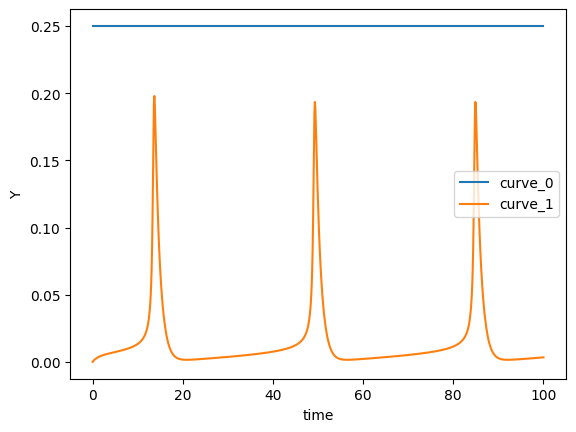

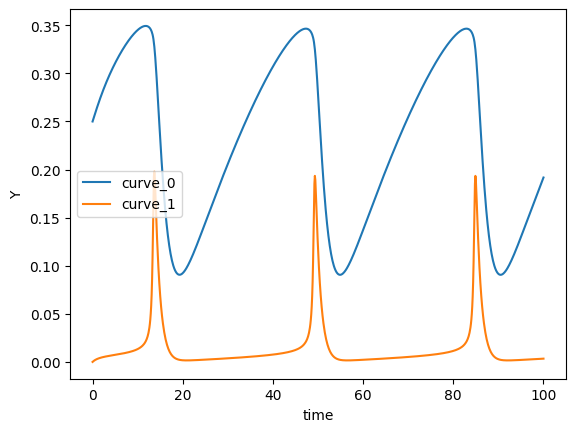

In [14]:
from workers import VerificationWorker

w1 = VerificationWorker(j2)

await w1.run()

w1.job_result.keys()

In [15]:
_calculate_pairwise_rmse(w1)

dict_keys(['comparison_id', 'cell', 'EmptySet', 'Reaction2', 'Reaction6', 'pM', 'Reaction1', 'Reaction7', 'pcyclin_cdc2', 'M', 'total_cyclin', 'CP', 'CT', 'YT', 'Time', 'Reaction4', 'Y', 'Reaction8', 'C2', 'Reaction3', 'YP', 'Reaction9', 'time', 'Reaction5'])
comparison_id
cell
EmptySet
Reaction2
Reaction6
pM
Reaction1
Reaction7
pcyclin_cdc2
M
total_cyclin
CP
CT
YT
Time
Reaction4
Y
Reaction8
C2
Reaction3
YP
Reaction9
time
Reaction5
comparison_id
cell
EmptySet
Reaction2
Reaction6
pM
Reaction1
Reaction7
pcyclin_cdc2
M
total_cyclin
CP
CT
YT
Time
Reaction4
Y
Reaction8
C2
Reaction3
YP
Reaction9
time
Reaction5


{'copasi': {'copasi': 0.0, 'tellurium': 0.027144264485925315},
 'tellurium': {'copasi': 0.027144264485925315, 'tellurium': 0.0}}

In [ ]:
v=1.7.1
./assets/scripts/build_image.sh compose_api "$v" && ./assets/scripts/build_image.sh compose_api "$v" AlexPatrie && ./assets/scripts/build_image.sh compose_worker "$v" && ./assets/scripts/build_image.sh compose_worker "$v" AlexPatrie

In [1]:
from output_data import generate_sbml_utc_outputs

o = generate_sbml_utc_outputs(sbml_fp='/Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml', start=0, dur=100, steps=1000, simulators=['copasi', 'pysces'])

Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.14.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /Users/alexanderpatrie/Pysces/psc
pysces.output_dir = /Users/alexanderpatrie/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS

In [5]:
dir('')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [3]:
!file -i /Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml

/Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml: regular file


In [1]:
sbml_fp='/Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'

In [2]:
from tempfile import mkdtemp
from output_data import run_sbml_pysces

o = run_sbml_pysces(sbml_fp=sbml_fp, start=0, dur=100, steps=1000)



Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.14.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /Users/alexanderpatrie/Pysces/psc
pysces.output_dir = /Users/alexanderpatrie/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS

UnicodeDecodeError: 'ascii' codec can't decode byte 0xcf in position 4744: ordinal not in range(128)

In [3]:
dir(pysces)

['DEBUG',
 'GNUPLOT_DIR',
 'ModelMap',
 'PITCONScanUtils',
 'ParScanner',
 'PyscesHTML',
 'PyscesInterfaces',
 'PyscesLink',
 'PyscesModel',
 'PyscesModelMap',
 'PyscesParse',
 'PyscesPlot2',
 'PyscesRandom',
 'PyscesSED',
 'PyscesScan',
 'PyscesStoich',
 'PyscesTest',
 'PyscesUtils',
 'PyscesWeb',
 'RateChar',
 'SBML',
 'SED',
 'ScanDataObj',
 'Scanner',
 '__CHGDIR_ON_START__',
 '__CUSTOM_DATATYPE__',
 '__MATPLOTLIB_BACKEND__',
 '__PyscesConfigDefault',
 '__SILENT_START__',
 '__USE_GNUPLOT__',
 '__USE_MATPLOTLIB__',
 '__builtins__',
 '__cached__',
 '__config_dict',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__userdict',
 '__version__',
 '_checkPandas',
 'absolute_import',
 'alt_import',
 'alt_import_nleq2',
 'alt_import_pitcon',
 'backup_dir',
 'core2',
 'current_version_tuple',
 'division',
 'enablePandas',
 'extra_dll_dir',
 'html',
 'inipath',
 'install_dir',
 'interface',
 'lib',
 'link',
 'loadSBML',
 'lpath',
 'model',
 'mode

In [6]:
pysces.loadSBML(sbml_fp)

Check SBML support is at action level 2
SBML file is L2V3
Info: single compartment model: locating "Reaction1" in default compartment
Info: single compartment model: locating "Reaction2" in default compartment
Info: single compartment model: locating "Reaction3" in default compartment
Info: single compartment model: locating "Reaction4" in default compartment
Info: single compartment model: locating "Reaction5" in default compartment
Info: single compartment model: locating "Reaction6" in default compartment
Info: single compartment model: locating "Reaction7" in default compartment
Info: single compartment model: locating "Reaction8" in default compartment
Info: single compartment model: locating "Reaction9" in default compartment
Info: single compartment model: locating "Reaction10" in default compartment
Info: single compartment model: locating "Reaction11" in default compartment
Info: single compartment model: locating "Reaction12" in default compartment
Writing file: /Users/alexan

In [2]:
import pysces
import os 
from tempfile import mkdtemp
# model compilation
compilation_dir = mkdtemp()
sbml_filename = sbml_fp.split('/')[-1]
psc_filename = sbml_filename + '.psc'
psc_fp = os.path.join(compilation_dir, psc_filename)
modelname = sbml_filename.replace('.xml', '')
# convert sbml to psc
psc_fp

pysces.interface.convertSBML2PSC(sbml_fp, pscfile=psc_fp)

Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.14.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /Users/alexanderpatrie/Pysces/psc
pysces.output_dir = /Users/alexanderpatrie/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS

In [4]:
import pysces

model = pysces.model(sbml_fp)

model

Assuming extension is .psc
Models available in your model_dir: 
************

************


You need to specify a valid model file ...

Assuming extension is .psc
Models available in your model_dir: 
************

************


You need to specify a valid model file ...



KeyboardInterrupt: Interrupted by user

In [10]:
from output_data import get_sbml_species_mapping
dur = 100

model.sim_start = 0
model.sim_stop = dur
model.sim_points = 1000 + 1
model.Simulate()
sbml_species_mapping = get_sbml_species_mapping(sbml_fp)
obs_names = list(sbml_species_mapping.keys())
obs_ids = list(sbml_species_mapping.values())
data = {
    obs_names[i]: model.data_sim.getSimData(obs_id)
    for i, obs_id in enumerate(obs_ids)
}

LSODA time for 1001 points: 0.022348880767822266


In [11]:
data

{'LacI protein': array([[0.00000000e+00, 0.00000000e+00],
        [1.00000000e-02, 1.03828070e-02],
        [2.00000000e-02, 4.14737253e-02],
        ...,
        [9.98000000e+00, 6.20878430e+02],
        [9.99000000e+00, 6.20961486e+02],
        [1.00000000e+01, 6.21044273e+02]]),
 'TetR protein': array([[0.00000000e+00, 0.00000000e+00],
        [1.00000000e-02, 1.39379789e+00],
        [2.00000000e-02, 2.80255906e+00],
        ...,
        [9.98000000e+00, 5.33136287e+02],
        [9.99000000e+00, 5.32905604e+02],
        [1.00000000e+01, 5.32674708e+02]]),
 'cI protein': array([[0.00000000e+00, 0.00000000e+00],
        [1.00000000e-02, 1.03807169e-02],
        [2.00000000e-02, 4.14401472e-02],
        ...,
        [9.98000000e+00, 1.41079445e+02],
        [9.99000000e+00, 1.41042012e+02],
        [1.00000000e+01, 1.41004532e+02]]),
 'LacI mRNA': array([[ 0.        ,  0.        ],
        [ 0.01      ,  0.29948074],
        [ 0.02      ,  0.59792523],
        ...,
        [ 9.98     

In [1]:
from output_data import run_sbml_pysces
o = run_sbml_pysces(sbml_fp='/Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml', start=0, dur=100, steps=1000)

Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.14.1)
RateChar is available
INFO: Parallel scanner not available

PySCeS environment
******************
pysces.model_dir = /Users/alexanderpatrie/Pysces/psc
pysces.output_dir = /Users/alexanderpatrie/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.2) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS

UnicodeDecodeError: 'ascii' codec can't decode byte 0xcf in position 4744: ordinal not in range(128)

In [2]:
!file -i /Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml

/Users/alexanderpatrie/Desktop/repos/bio-check/model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml: regular file


In [3]:
import sys
print(sys.getdefaultencoding())

utf-8
